# IT402 Soft Computing Lab

Submitted by: Harsh Agarwal (181IT117)

### Importing the libraries

In [1]:
from math import exp        
import pandas as pd
import numpy as np

### Setting the max no. of iterations and Threshold value

In [2]:
MAX_ITERS=50
THRESHOLD=0.5

### Reading the dataset

In [4]:
df=pd.read_csv('Heart_Dataset.csv', header=None)
class_values=np.unique(df[22])
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,0,0,0,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,1
2,1,1,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,1,0,0,0,0,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,0,1,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,1,1,0,0
77,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
78,0,0,0,1,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,1


### Shuffling the dataset tuples

In [5]:
df = df.sample(frac=1).reset_index(drop=True)
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,1,0,0,1,1,1,...,1,0,0,1,1,1,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,1,1,1,1,1,1,0,0,0,...,1,1,0,1,1,1,1,1,0,1
76,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
77,1,0,0,1,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,1
78,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Normalizing the dataset values

In [7]:
class_label=df[22]
df=(df-df.mean())/df.std()
df=df.assign(target=class_label)
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,target
0,-0.99373,-0.749346,-0.437726,-0.592860,-0.516206,-0.650549,-0.375595,-0.592860,-0.612020,-0.477373,...,-0.496865,-0.282962,-0.457679,-0.331243,-0.282962,-0.477373,-0.535438,-0.554601,-0.689538,0
1,0.99373,-0.749346,2.255975,-0.592860,-0.516206,-0.650549,-0.375595,1.665654,1.613508,-0.477373,...,-0.496865,-0.282962,-0.457679,-0.331243,-0.282962,-0.477373,-0.535438,-0.554601,-0.689538,0
2,0.99373,-0.749346,2.255975,1.665654,1.912997,-0.650549,-0.375595,1.665654,1.613508,2.068615,...,-0.496865,-0.282962,2.157628,2.981191,3.489866,-0.477373,-0.535438,1.780560,1.432118,1
3,-0.99373,-0.749346,-0.437726,-0.592860,-0.516206,-0.650549,-0.375595,-0.592860,-0.612020,-0.477373,...,-0.496865,-0.282962,-0.457679,-0.331243,-0.282962,-0.477373,-0.535438,-0.554601,1.432118,1
4,-0.99373,-0.749346,-0.437726,-0.592860,-0.516206,-0.650549,-0.375595,-0.592860,-0.612020,2.068615,...,1.987461,-0.282962,-0.457679,-0.331243,-0.282962,-0.477373,-0.535438,-0.554601,-0.689538,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.99373,1.317816,2.255975,1.665654,1.912997,1.517948,2.629163,-0.592860,-0.612020,-0.477373,...,1.987461,-0.282962,2.157628,2.981191,3.489866,2.068615,1.844285,-0.554601,1.432118,1
76,-0.99373,-0.749346,-0.437726,-0.592860,-0.516206,-0.650549,-0.375595,-0.592860,-0.612020,-0.477373,...,-0.496865,-0.282962,-0.457679,-0.331243,-0.282962,2.068615,1.844285,-0.554601,-0.689538,0
77,0.99373,-0.749346,-0.437726,1.665654,1.912997,-0.650549,-0.375595,-0.592860,1.613508,2.068615,...,1.987461,-0.282962,-0.457679,-0.331243,-0.282962,-0.477373,-0.535438,-0.554601,1.432118,1
78,-0.99373,-0.749346,-0.437726,1.665654,-0.516206,-0.650549,-0.375595,-0.592860,-0.612020,-0.477373,...,-0.496865,-0.282962,-0.457679,-0.331243,-0.282962,-0.477373,-0.535438,-0.554601,-0.689538,0


### Defining Class for Neuron and Neural Network with functions

In [8]:
class Neuron:
    def __init__(self, weights, bias):
        self.weights=weights
        self.bias=bias
        
        
    def output(self, inputs):
        y=self.bias
        y+=sum(w*ip for w,ip in zip(self.weights, inputs))
        return 1/(1+exp(-y))
    
    def update(self, l_rate, error, outputs):
        # Update bias value
        self.bias=self.bias+l_rate*error
        
        # Update weights value
        for i in range(len(self.weights)):
            self.weights[i]=self.weights[i]+l_rate*error*outputs[i]

In [9]:
class Network:
    def __init__(self,weights,biases):
        self.weights=weights # 3D array
        self.biases=biases # 2D array
        self.outputs=[[0 for _ in range(len(weights[i]))] for i in range(len(weights))]+[[0 for _ in range(len(biases[-1]))]]
        self.errors=[[0 for _ in range(len(weights[i]))] for i in range(len(weights))]+[[0 for _ in range(len(biases[-1]))]]
        self.actual=0
        self.neurons=[]
        for i,l_biases in enumerate(biases):
            n=[]
            for j, bias in enumerate(l_biases):
                wts=[wt[j] for wt in weights[i]]
                n.append(Neuron(wts, bias))
            self.neurons.append(n)

    def feed_forward(self, inp):
        X=inp[:-1]
        self.actual=inp[-1]
        self.outputs[0]=X
        for layer,neurons in enumerate(self.neurons):
            op=[]
            for neuron in neurons:
                op.append(neuron.output(self.outputs[layer]))
            self.outputs[layer+1]=op
        return op[0]
    
    def back_propagate(self, l_rate):
        last=True
        for layer in range(len(self.outputs)-1,0,-1):
            for i in range(len(self.neurons[layer-1])):
                op=self.outputs[layer][i]
                op_prev=self.outputs[layer-1]
                error=op*(1-op)
                if last:
                    error*=(self.actual-op)
                else:
                    error*=sum(self.errors[layer+1])
                self.neurons[layer-1][i].update(l_rate, error, op_prev)
                self.errors[layer][i]=error
            last=False
    
    def train(self, dataset):
        for epoch in range(MAX_ITERS):
            for row in dataset:
                self.feed_forward(row)
                self.back_propagate(l_rate=1/(epoch+1))
                
    def output(self, inp):
        return self.feed_forward(inp)        

### Assigning weights and biases as given in ques

In [10]:
n=len(df)
weights=[]
weights.append([[1/(n*5) for _ in range(5)] for _ in range(len(df.columns)-1)])
weights.append([[1/5] for _ in range(5)])

biases=[]
biases.append([1/6 for _ in range(5)])
biases.append([1/6])

### Performing 10 Fold Cross Validation

In [21]:
skip=len(df)//10
init=0
n=len(df)
weights=[]
weights.append([[1/(n*5) for _ in range(5)] for _ in range(len(df.columns)-1)])
weights.append([[1/5] for _ in range(5)])

biases=[]
biases.append([1/6 for _ in range(5)])
biases.append([1/6])

class_count=len(class_values)
conf_matrix = pd.DataFrame(np.zeros((class_count,class_count), dtype='int'), index = class_values, columns = class_values)\
.rename_axis('Predicted')\
.rename_axis('Actual', axis="columns").T


for _ in range(10):
    test=df[init:init+skip].to_numpy()
    train=df.drop(range(init,init+skip)).to_numpy()
    init+=skip
    
    network=Network(weights=weights, biases=biases)
    network.train(train)
    for row in test:
        X=row[:-1]
        actual=row[-1]
        pred=network.output(row)
        pred=0 if pred<THRESHOLD else 1
        conf_matrix[pred][actual]+=1
df_confusion=conf_matrix
df_confusion

Predicted,0,1
Actual,,
0,53,1
1,0,26


In [22]:
total_tp=0
total_recall=0
total_precision=0
total_f1=0

for class_type in class_values:
    TP=df_confusion.loc[class_type][class_type]
    FN=sum(df_confusion.loc[class_type , : ])-TP
    FP=sum(df_confusion[class_type])-TP
    TN=df_confusion.values.sum()-(TP+FN+FP)

    precision=TP/(FP+TP)
    recall=TP/(TP+FN)
    f1=2*precision*recall/(precision+recall)

    total_recall+=recall
    total_precision+=precision
    total_f1+=f1
    total_tp+=TP


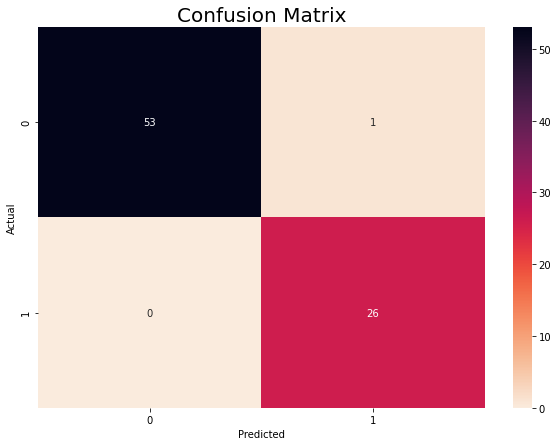

In [23]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.title('Confusion Matrix', fontsize = 20)
sn.heatmap(df_confusion, annot=True, cmap=sn.cm.rocket_r)
plt.show()

In [24]:
accuracy=100*total_tp/df_confusion.values.sum()
print("\nAvg Accuracy: {}%".format(round(accuracy,4)))
print("Avg precision: {}".format(round(total_precision/len(class_values),4)))
print("Avg recall: {}".format(round(total_recall/len(class_values),4)))
print("Avg f1 score: {}".format(round(total_f1/len(class_values),4)))


Avg Accuracy: 98.75%
Avg precision: 0.9815
Avg recall: 0.9907
Avg f1 score: 0.9859
